In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# plt.rcParams['figure.figsize'] = [10, 10]

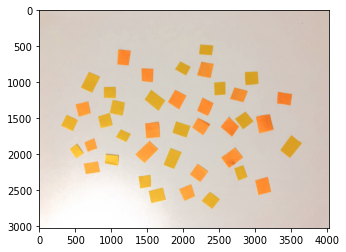

In [3]:
original_image = cv2.imread('stickers.jpg')

# original_image = original_image[:, :, ::-1]

plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB));

In [4]:
resized_image = cv2.resize(original_image, None, fx=0.75, fy=0.75)

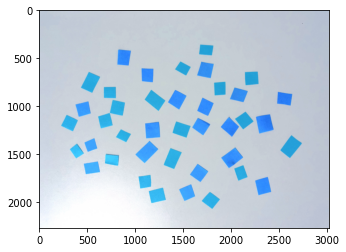

In [5]:
plt.imshow(resized_image);

In [6]:
hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)
# hsv_image = resized_image

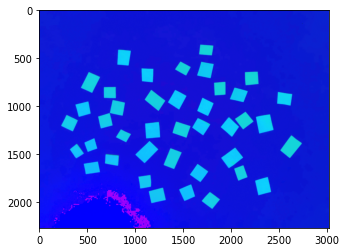

In [7]:
plt.imshow(hsv_image);

In [8]:
# Yellow range
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([45, 255, 255])

In [9]:
mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

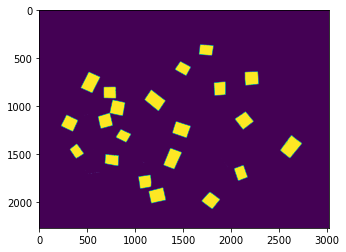

In [10]:
plt.imshow(mask);

In [11]:
contours, _ = cv2.findContours(
    mask,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE
)

In [12]:
final_image = resized_image.copy()

In [13]:
color_bbox = (255, 0, 0)
count = 0
for contour in contours:
    rect = cv2.boundingRect(contour)
    x,y,w,h = rect
    area = w * h
    if area > 1000:
        count += 1
        cv2.rectangle(final_image, (x, y), (x+w, y+h), color_bbox, 5)

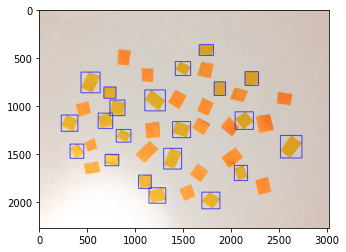

In [14]:
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB));

In [15]:
print(f'Количество желтых стикеров: {count}')

Количество желтых стикеров: 21
